# Module 6: Classification

The following tutorial contains Python examples for solving classification problems. You should refer to the Chapters 3 and 4 of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial.

Classification is the task of predicting a nominal-valued attribute (known as class label) based on the values of other attributes (known as predictor variables). The goals for this tutorial are as follows:
1. To provide examples of using different classification techniques from the scikit-learn library package.
2. To demonstrate the problem of model overfitting.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## What if the data is not categorical, i.e. if the data is continous numerical value? Can we use tree for the same? 

Answer is Yes.

We can use the Decision Tree Regressor Model to work on the continous numerical value.

Here is the link for the DecisionTreeRegressor Model.

DecisionTreeRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Decision Tree Regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])


In [3]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int)
y = dataset[:, 2].astype(int)



In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [5]:
y_pred = regressor.predict([[3750]])
print("Predicted price: % d\n"% y_pred)


Predicted price:  8000



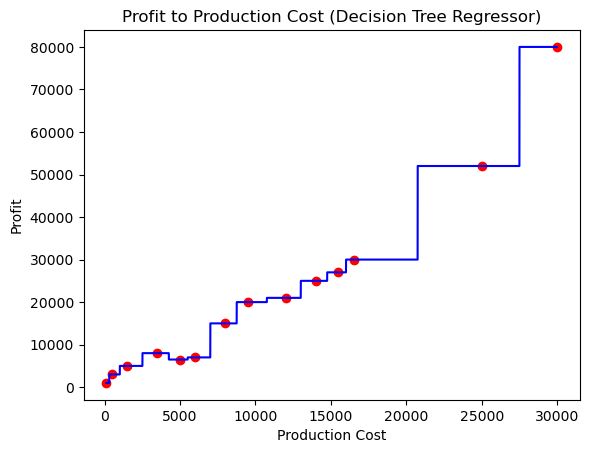

In [6]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Profit to Production Cost (Decision Tree Regressor)')
plt.xlabel('Production Cost')
plt.ylabel('Profit')
plt.show()


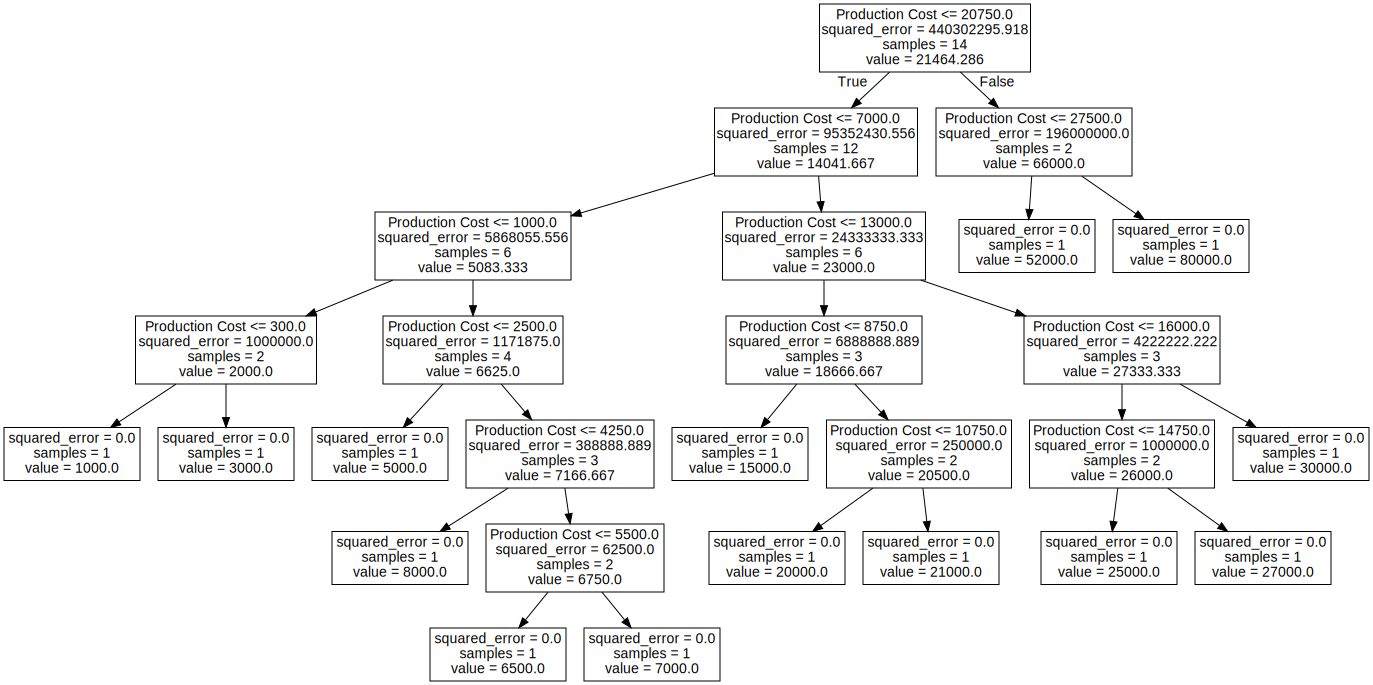

In [7]:
from sklearn import tree
import graphviz  

dot_data = tree.export_graphviz(regressor, out_file =None,feature_names =['Production Cost'])  

graph = graphviz.Source(dot_data)  
graph

##  For Decsision Tree Classifier

In [8]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Vertebrate Dataset

We use a variation of the vertebrate data described in Example 3.1 of Chapter 3. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a *one hot encoding* binary representation. To illustrate this, we will first load the data into a Pandas DataFrame object and display its content.

In [10]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('data/movie_metadata.csv',header='infer')
data

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0                      Documentary   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...               3054.0  English      USA           PG-13  237000000.0   
1     ...               1238.0  English      USA           PG-13  300000000.0   
2     ...                994.0  English       UK           PG-13  245000000.0   
3     ...               2701.0  English      USA           PG-13  250000000.0   
4     ...                  NaN      NaN      NaN             NaN          NaN   
...   ...                  ...      ...      ...             ...          ...   
5038  ...                  6.0  English   Canada             NaN          NaN   
5039  ...                359.0  English      USA           TV-14          NaN   
5040  ...                  3.0  English      USA             NaN       1400.0   
5041  ...                  9.0  English      USA           PG-13          NaN   
5042  ...                 84.0  English      USA              PG       1100.0   

      title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0         2009.0                  936.0        7.9          1.78   
1         2007.0                 5000.0        7.1          2.35   
2         2015.0                  393.0        6.8          2.35   
3         2012.0                23000.0        8.5          2.35   
4            NaN                   12.

Given the limited number of training examples, suppose we convert the problem into a binary classification task (mammals versus non-mammals). We can do so by replacing the class labels of the instances to *non-mammals* except for those that belong to the *mammals* class.

In [29]:
data['genres'] = data['genres'].replace(['Fantasy','Sci-Fi','Thriller','Documentary','Musical','Romance','Comedy','Western','Biography','History','War'],'non-action_or_adventure')
data

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN          non-action_or_adventure   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0          non-action_or_adventure   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...               3054.0  English      USA           PG-13  237000000.0   
1     ...               1238.0  English      USA           PG-13  300000000.0   
2     ...                994.0  English       UK           PG-13  245000000.0   
3     ...               2701.0  English      USA           PG-13  250000000.0   
4     ...                  NaN      NaN      NaN             NaN          NaN   
...   ...                  ...      ...      ...             ...          ...   
5038  ...                  6.0  English   Canada             NaN          NaN   
5039  ...                359.0  English      USA           TV-14          NaN   
5040  ...                  3.0  English      USA             NaN       1400.0   
5041  ...                  9.0  English      USA           PG-13          NaN   
5042  ...                 84.0  English      USA              PG       1100.0   

      title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0         2009.0                  936.0        7.9          1.78   
1         2007.0                 5000.0        7.1          2.35   
2         2015.0                  393.0        6.8          2.35   
3         2012.0                23000.0        8.5          2.35   
4            NaN                   12.

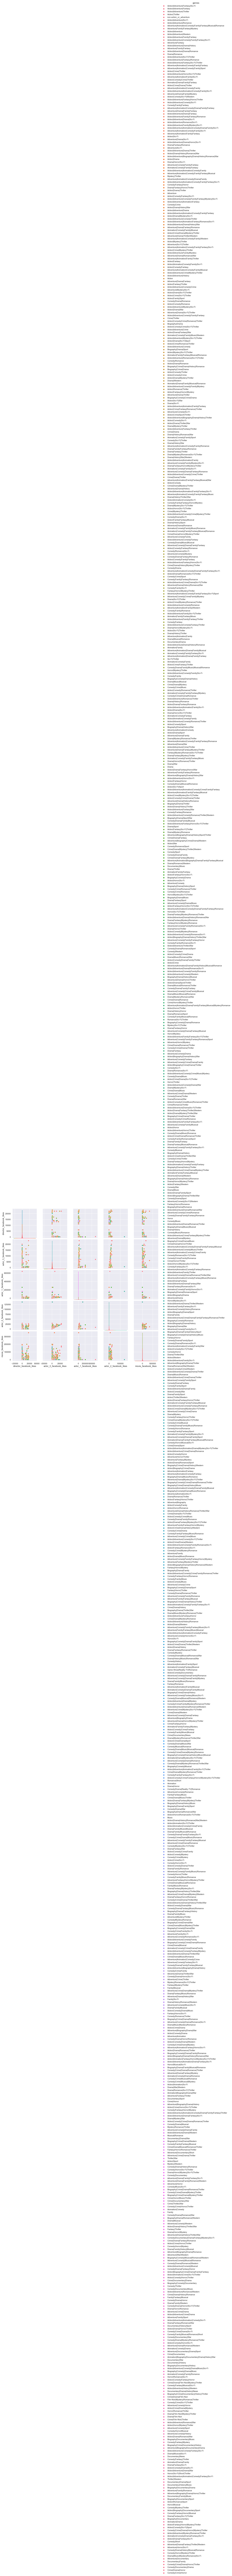

In [30]:
# Paired plot using likes
sns.set()
sns.pairplot(data[['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes','actor_2_facebook_likes','movie_facebook_likes','genres']],
             hue='genres', diag_kind="kde")

We can apply Pandas cross-tabulation to examine the relationship between the Warm-blooded and Gives Birth attributes with respect to the class. 

In [11]:
pd.crosstab([data['actor_1_facebook_likes'],data['actor_2_facebook_likes']],data['genres'])

genres                                         Action  Action|Adventure  \
actor_1_facebook_likes actor_2_facebook_likes                             
0.0                    0.0                          0                 0   
2.0                    0.0                          0                 0   
                       2.0                          0                 0   
3.0                    2.0                          0                 0   
                       3.0                          0                 0   
...                                               ...               ...   
164000.0               137000.0                     0                 0   
260000.0               454.0                        1                 0   
                       984.0                        0                 0   
                       21000.0                      0                 0   
640000.0               8000.0                       0                 0   

genres                                         Action|Adventure|Animation|Comedy|Crime|Family|Fantasy  \
actor_1_facebook_likes actor_2_facebook_likes                                                           
0.0                    0.0                                                                     0        
2.0                    0.0                                                                     0        
                       2.0                                                                     0        
3.0                    2.0                                                                     0        
                       3.0                                                                     0        
...                                                                                          ...        
164000.0               137000.0                                                                0        
260000.0               454.0                                                                   0        
                       984.0                                                                   0        
                       21000.0                                                                 0        
640000.0               8000.0                                                                  0        

genres                                         Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller  \
actor_1_facebook_likes actor_2_facebook_likes                                                                    
0.0                    0.0                                                                     0                 
2.0                    0.0                                                                     0                 
                       2.0                                                                     0                 
3.0                    2.0                                                                     0                 
                       3.0                                                                     0                 
...                                                                                          ...                 
164000.0               137000.0                                                                0                 
260000.0               454.0                                                                   0                 
                       984.0                                                                   0                 
                       21000.0                                                                 0                 
640000.0               8000.0                                                                  0                 

genres                                         Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi  \
actor_1_facebook_likes actor_2_facebook_likes                          

The results above show that it is possible to distinguish mammals from non-mammals using these two attributes alone since each combination of their attribute values would yield only instances that belong to the same class. For example, mammals can be identified as warm-blooded vertebrates that give birth to their young. Such a relationship can also be derived using a decision tree classifier, as shown by the example given in the next subsection.

## Decision Tree Classifier

In this section, we apply a decision tree classifier to the vertebrate dataset described in the previous subsection.

In [12]:
from sklearn import tree

Y = pd.DataFrame(data, columns=['genres'])
X = data.drop(['director_name','genres'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

ValueError: could not convert string to float: 'Color'

In [ ]:
X

The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function. 

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)  

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Action','Adventure','non-action_or_adventure'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Next, suppose we apply the decision tree to classify the following test examples.

In [ ]:
testData = [['Doug Walker',0,0,0,0,1,1,'non-action_or_adventure'],
           ['Ang Lee',1,0,0,0,1,1,'Action'],
           ['James Cameron',1,0,0,1,1,0,'non-action_or_adventure'],
           ['Dan Scanlon',1,1,1,0,0,0,'Adventure']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [ ]:
testY = pd.DataFrame(testData, columns=['genres'])
testX = testData.drop(['director_name','genres'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['director_name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions





Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

confusion = confusion_matrix(testY, predY)
print(confusion)

plot_confusion_matrix(confusion, data.Class.unique(), title='Confusion matrix', cmap=plt.cm.Blues)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predY,pos_label='Action')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predY,pos_label='Action')))
print('Recall score on test data is %.2f' % (recall_score(testY, predY,pos_label='Action')))
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predY,pos_label='Adventure')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predY,pos_label='Adventure')))
print('Recall score on test data is %.2f' % (recall_score(testY, predY,pos_label='Adventure')))
print( classification_report(testY,predY))


In [ ]:

list(data.Class.unique())


## Logistic Regression

In this section, we apply a Logistic Regression to the vertebrate dataset described in the previous subsection.

In [ ]:
from sklearn.linear_model import LogisticRegression


C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X,Y.values.ravel())
    log_reg_pred = clf.predict(testX)
    log_reg_pred_train = clf.predict(X)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(testY, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## Naive Bayes Classifier

In this section, we apply a Naise Bayes classifier to the vertebrate dataset described in the previous subsection.

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y.values.ravel())
NB_pred = clf_NB.predict(testX)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))

## Support Vector Machine (SVM) Classifier

In this section, we apply a SVM classifier to the vertebrate dataset described in the previous subsection. We will also experiment with C-parameter and different kernals and see how it effects the performance of the model.

### Linear Decision Boundary

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X,Y.values.ravel())
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

### Non Linear Decision Boundary

In [ ]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
 

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y.values.ravel())
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## K Nearest Neighbor (KNN) Classifier

In this section, we apply a K - Nearest Neighbor classifier to the vertebrate dataset described in the previous subsection. We will also look at how the K value effect the performance of the Model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X, Y.values.ravel())
    knn_pred = clf.predict(testX)
    knn_pred_train = clf.predict(X)
    print(knn_pred)
    testAcc.append(accuracy_score(testY, knn_pred))
    trainAcc.append(accuracy_score(Y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

## Artificial Neural Network

In [ ]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

In [ ]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [ ]:
data_df = pd.read_csv('data/movie_metadata.csv',header='infer')

In [30]:
data_df = data_df.drop('director_name', axis=1)
data_df['genres'] = data_df['genres'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
Classes = encode_text_index(data_df,'genres')


In [31]:
data_df

Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  Has Legs  \
0              1            1                 0                0         1   
1              0            0                 0                0         0   
2              0            0                 1                0         0   
3              1            1                 1                0         0   
4              0            0                 1                0         1   
5              0            0                 0                0         1   
6              1            1                 0                1         1   
7              1            0                 0                1         1   
8              1            1                 0                0         1   
9              0            1                 1                0         0   
10             0            0                 1                0         1   
11             1            0                 1                0         1   
12             1            1                 0                0         1   
13             0            0                 1                0         0   
14             0            0                 1                0         1   

    Hibernates  Class  
0            0      0  
1            1      1  
2            0      1  
3            0      0  
4            1      1  
5            0      1  
6            1      0  
7            0      1  
8            0      0  
9            0      1  
10           0      1  
11           0      1  
12           1      0  
13           0      1  
14           1      1

In [32]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

Name  Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
0  gila monster             0            0                 0                0   
1      platypus             1            0                 0                0   
2           owl             1            0                 0                1   
3       dolphin             1            1                 1                0   

   Has Legs  Hibernates        Class  
0         1           1  non-mammals  
1         1           1      mammals  
2         1           0  non-mammals  
3         0           0      mammals

In [33]:
testData = testData.drop('director_name', axis=1)
encode_text_index(testData,'genres')

array(['mammals', 'non-mammals'], dtype=object)

In [34]:
testData

Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  Has Legs  \
0             0            0                 0                0         1   
1             1            0                 0                0         1   
2             1            0                 0                1         1   
3             1            1                 1                0         0   

   Hibernates  Class  
0           1      1  
1           1      0  
2           0      1  
3           0      0

In [35]:
Classes

array(['mammals', 'non-mammals'], dtype=object)

In [36]:
X,Y = to_xy(data_df,'genres')
testX, testY = to_xy(testData,'genres')

In [37]:
print(X.shape)
print(Y.shape)
Y

(15, 6)
(15, 2)


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [38]:
model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

Epoch 1/100
1/1 - 0s - loss: 0.7511 - 299ms/epoch - 299ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7485 - 5ms/epoch - 5ms/step
Epoch 3/100
1/1 - 0s - loss: 0.7459 - 2ms/epoch - 2ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7436 - 1ms/epoch - 1ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7413 - 2ms/epoch - 2ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7390 - 2ms/epoch - 2ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7368 - 1ms/epoch - 1ms/step
Epoch 8/100
1/1 - 0s - loss: 0.7345 - 2ms/epoch - 2ms/step
Epoch 9/100
1/1 - 0s - loss: 0.7323 - 2ms/epoch - 2ms/step
Epoch 10/100
1/1 - 0s - loss: 0.7300 - 1ms/epoch - 1ms/step
Epoch 11/100
1/1 - 0s - loss: 0.7277 - 2ms/epoch - 2ms/step
Epoch 12/100
1/1 - 0s - loss: 0.7254 - 2ms/epoch - 2ms/step
Epoch 13/100
1/1 - 0s - loss: 0.7232 - 1ms/epoch - 1ms/step
Epoch 14/100
1/1 - 0s - loss: 0.7210 - 2ms/epoch - 2ms/step
Epoch 15/100
1/1 - 0s - loss: 0.7187 - 1ms/epoch - 1ms/step
Epoch 16/100
1/1 - 0s - loss: 0.7165 - 2ms/epoch - 2ms/step
Epoch 17/100
1/1 - 0s - loss: 0.7143 - 2ms/ep

In [39]:
pred = model.predict(testX)
print(pred[0])

1/1 [==============================] - 0s 84ms/step
[0.38755625 0.61244375]


In [40]:
pred = np.argmax(pred, axis=1)

In [41]:
true = np.argmax(testY, axis=1)

In [42]:
Classes[pred]

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [43]:
Classes[true]

array(['non-mammals', 'mammals', 'non-mammals', 'mammals'], dtype=object)

In [44]:
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.75


In [45]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

